In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import shap

In [150]:
from sklearn.tree import export_graphviz
#import graphviz

In [151]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\onlab\\bme_onlab\\data_cleaning\\battery.csv', delimiter=';')
random = 5

min_value = df['emission_per_m'].min()
max_value = df['emission_per_m'].max()

# Calculate the range
range = max_value - min_value
range

1.1908305429918027

In [152]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['emission_per_m'])  # Features
y = df['emission_per_m']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

In [153]:
# Initialize and train the decision tree regressor
regression_tree = DecisionTreeRegressor(random_state=random)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

In [154]:
# Visualize the decision tree
#plt.figure(figsize=(20, 10))
#plot_tree(regression_tree, feature_names=X.columns, filled=True)
#plt.show()

In [155]:
# Predict on the test set
y_pred = regression_tree.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0010736278536311599


In [156]:
# Calculate feature importance
importances = regression_tree.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print(sorted_importances)

[('elevation_up_per_m', 0.8056898205132389), ('elevation_down_per_m', 0.17555995448087303), ('stops_per_m', 0.009289301264505523), ('avgSpeed', 0.005401929124370295), ('timeloss_per_m', 0.0037913800376007047), ('trafficScale', 0.0002676145794114409)]


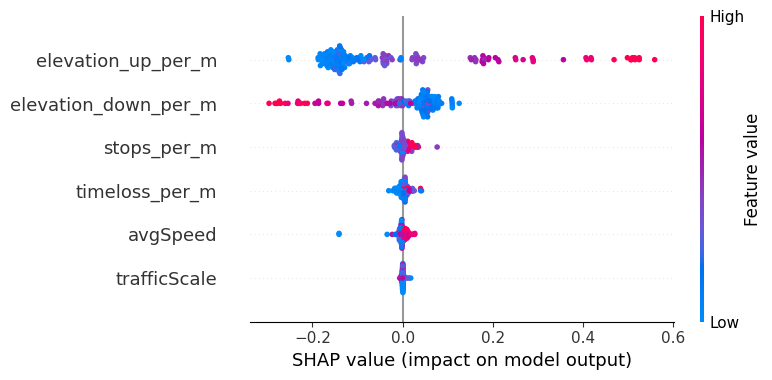

In [157]:
# Calculate SHAP values
explainer = shap.TreeExplainer(regression_tree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [158]:
# Visualize the decision tree
# You need to have graphviz installed for this

#dot_data = export_graphviz(regression_tree, out_file=None, feature_names=X.columns, filled=True)
#graph = graphviz.Source(dot_data)
#graph.render("decision_tree")